# problem 9

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import cv2
import glob
import matplotlib.pyplot as plt
import copy
import mnist_reader as mnist
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import accuracy_score as ACC
from tqdm.notebook import tqdm

# combine train and test together

In [7]:
DATA_SET_PATH = "mnist/"
train_imgs , train_labels = mnist.load_mnist(DATA_SET_PATH , kind = 'train')
test_imgs , test_labels = mnist.load_mnist(DATA_SET_PATH , kind = 't10k')

image path mnist/train-images-idx3-ubyte.gz
image path mnist/t10k-images-idx3-ubyte.gz


In [8]:
data = np.concatenate((train_imgs , test_imgs) , axis = 0)

# standard form
data = data.T
train_imgs = train_imgs.T
test_imgs = test_imgs.T

# pca

In [9]:
class PCA():
    def __init__(self , th = 10**1 , whiten = False):
        self.th = th
        self.whiten = whiten
        
    def fit(self , X):
        #mean of data
        self.m = np.atleast_2d(np.mean(X , axis = 1)).T
        
        #scatter matrix
        self.S = (X.shape[1]-1) * np.cov(X)
        
        #eigen values and eigen vectors
        self.w , self.V = np.linalg.eig(self.S)
        self.V = np.real(self.V)
        self.w = np.real(self.w)
        
        #condition number
        self.cn = np.max(np.abs(self.w)) / np.abs(self.w)
        
        #mask
        self.mask = self.cn < self.th
        
        
        # D matrix for whitening
        if self.whiten is False :
            self.D = np.eye(X.shape[0])
        else :
            self.D = np.diag(np.square(1/self.w[self.mask]))
            
        # transform matrix
        self.T = np.matmul(self.D , self.V[: , self.mask].T)
        
        #final_features
        self.n_features_ = sum(self.mask)
        self.features_ = X.shape[0]
            
    def transform(self , X):
        return np.matmul(self.T , (X - self.m))

In [19]:
pca1 = PCA(whiten=True)
pca1.fit(data)
np.max(pca1.cn) , np.min(pca1.w) , np.max(pca1.w) , pca1.features_ , pca1.n_features_

(154173308.2466142, 109.37509654080506, 16862720473.488724, 784, 6)

In [8]:
pca2 = PCA(whiten=True)
pca2.fit(train_imgs)
np.max(pca2.cn) , np.min(pca2.w), np.max(pca2.w) , pca2.features_ , pca2.n_features_

(202645743.7905276, 63.86550859558336, 12942073491.912323, 784, 603)

In [9]:
pca3 = PCA(whiten=True)
pca3.fit(test_imgs)
np.max(pca3.cn) , np.min(pca3.w), np.max(pca3.w) , pca3.features_ , pca3.n_features_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


(inf, 0.0, 3921822088.964669, 784, 555)

#  A) eigen values sorted

In [10]:
pca1.w.sort()
pca1.w[::-1]

array([1.68627205e+10, 1.03389054e+10, 3.41728510e+09, 2.84574939e+09,
       2.20645070e+09, 1.95402598e+09, 1.34403594e+09, 1.09858228e+09,
       7.72924827e+08, 7.65054468e+08, 5.76883668e+08, 5.21031643e+08,
       4.39539101e+08, 3.74489082e+08, 3.52063107e+08, 3.45748094e+08,
       3.15468934e+08, 3.02127179e+08, 2.65836726e+08, 2.61155813e+08,
       2.53795557e+08, 2.39136799e+08, 2.24184286e+08, 2.15286753e+08,
       2.10220229e+08, 2.01229220e+08, 1.92036243e+08, 1.84303808e+08,
       1.78812383e+08, 1.69562229e+08, 1.59828021e+08, 1.52481606e+08,
       1.50366588e+08, 1.46746991e+08, 1.42248654e+08, 1.35885075e+08,
       1.31650831e+08, 1.29870582e+08, 1.25389274e+08, 1.21080125e+08,
       1.14110546e+08, 1.13057009e+08, 1.12106199e+08, 1.04777348e+08,
       1.02478378e+08, 9.76751090e+07, 9.51675727e+07, 9.40827965e+07,
       9.36602710e+07, 8.92548985e+07, 8.84752699e+07, 8.66382499e+07,
       8.50592999e+07, 8.35912797e+07, 8.12282233e+07, 7.81825758e+07,
      

# B) naive bayes with pca

In [44]:
res = {}

for i in tqdm(range(2*10**2 , 10**3 , 10**2)):
    # apply pca
    pca1 = PCA(th=i , whiten=True)
    pca1.fit(data)

    # reduce data dims
    train_imgs_red = pca1.transform(train_imgs)
    test_imgs_red = pca1.transform(test_imgs)
    
    # train and test clf
    clf = NB()
    clf.fit(train_imgs_red.T , train_labels)
    pred = clf.predict(test_imgs_red.T)
    acci = ACC(pred , test_labels)
    
    # record
    res[i] = acci

Text(0, 0.5, 'acc')

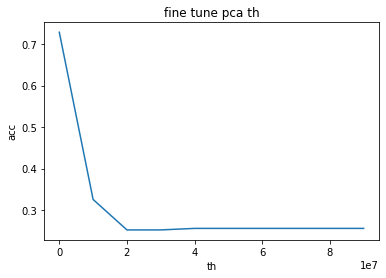

In [35]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title("fine tune pca th")
plt.xlabel("th")
plt.ylabel("acc")

Text(0, 0.5, 'acc')

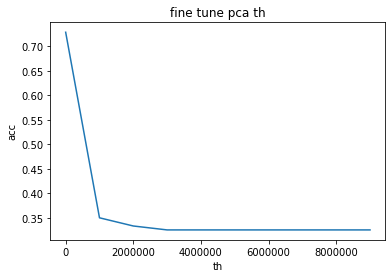

In [37]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title("fine tune pca th")
plt.xlabel("th")
plt.ylabel("acc")

Text(0, 0.5, 'acc')

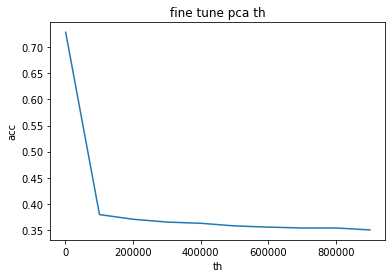

In [39]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title("fine tune pca th")
plt.xlabel("th")
plt.ylabel("acc")

Text(0, 0.5, 'acc')

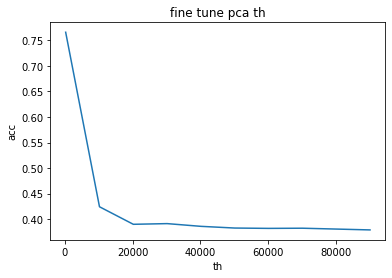

In [41]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title("fine tune pca th")
plt.xlabel("th")
plt.ylabel("acc")

Text(0, 0.5, 'acc')

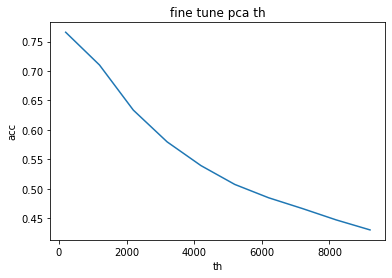

In [43]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title("fine tune pca th")
plt.xlabel("th")
plt.ylabel("acc")

Text(0, 0.5, 'acc')

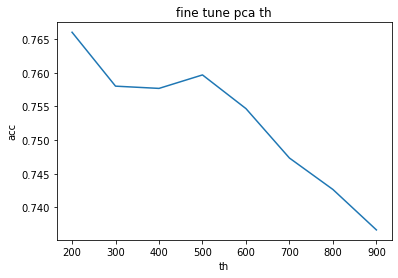

In [45]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title("fine tune pca th")
plt.xlabel("th")
plt.ylabel("acc")

#  pca on naive

In [10]:
pca1 = PCA(th=200 , whiten=True)
pca1.fit(data)

# reduce data dims
train_imgs_red = pca1.transform(train_imgs)
test_imgs_red = pca1.transform(test_imgs)

# train and test clf
clf = NB()
clf.fit(train_imgs_red.T , train_labels)
pred = clf.predict(test_imgs_red.T)
ACC(pred , test_labels)

0.766

In [12]:
pca1.n_features_

53

# naive bayes without dim reduction

In [11]:
clf = NB()
clf.fit(train_imgs.T , train_labels)
pred = clf.predict(test_imgs.T)
ACC(pred , test_labels)

0.5666666666666667

dimension redunction helped generalization on naive bayes clf. becuse in naive bayes we assume independency